In [1]:
import numpy as np
from collections import defaultdict
from itertools import product
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
class mastermind:
    def __init__(self, obj='random', guess_init='random', colors=['r','g','b','y','w','k'], obj_length=4):
        self.n_colors = len(colors)
        self.colors = colors
        self.obj_length = obj_length
        self.obj = np.random.choice(self.colors,self.obj_length).tolist() if obj == 'random' else obj
        self.guess_init = guess_init
        self.solved = False
        
        if self.guess_init == 'random':
            self.first_guess = np.random.choice(self.colors,self.obj_length).tolist()
        elif 'color' in self.guess_init:
            self.first_guess = (np.random.choice(self.colors,int(guess_init[0]), replace=False)
                                .tolist()*20)[:self.obj_length]
        
        self.guesses = [(self.first_guess, self.scorer(self.first_guess))]
        
        self.solutions = list(map(list, product(self.colors, repeat=self.obj_length)))
        
    def check_if_solved(self):
        return True if (sum(self.guesses[-1][1]) == self.obj_length) else False
    
    def scorer(self, guess):
        blacks = [1 for o,g in zip(self.obj,guess) if o == g]
        whites = [min([self.obj.count(x), guess.count(x)]) for x in set(guess)]
        score = blacks + [0]*(sum(whites)-sum(blacks))
        return score
    
    def eval_colors(self):
        guess, score = self.guesses[-1]
        rc = len(score) 
        tmp_sols = []
        for sol in self.solutions:
            tmp_guess = guess.copy()
            common = [e for e in sol if e in tmp_guess and tmp_guess.pop(tmp_guess.index(e))]
            if len(common) == rc:
                tmp_sols.append(sol)
        self.solutions = tmp_sols
                
    def eval_positions(self):
        guess, score = self.guesses[-1]
        blacks = sum(score)
        tmp_sols = []
        for sol in self.solutions:
            count = sum([1 for g,s in zip(guess,sol) if g == s])
            if count == blacks:
                tmp_sols.append(sol)
        self.solutions = tmp_sols
                
    def evaluate_guess(self):
#         print(len(self.solutions),end=' ')
        self.eval_colors()
#         print(len(self.solutions),end=' ')
        self.eval_positions()
#         print(len(self.solutions))
        self.solved = self.check_if_solved()
        if not self.solved:
            new_guess = self.solutions[np.random.choice(range(len(self.solutions)),1)[0]]
            self.guesses.append((new_guess, self.scorer(new_guess)))
        
    def start_game(self, verbose=False):
        while not self.solved:
            self.evaluate_guess()
        if verbose:
            print('Solved in %s turns' % len(self.guesses))

In [3]:
def plot_simulation(data,title=''):
    plt.hist(data,bins=np.arange(1,11)-.5)
    plt.axvline(np.mean(data),linestyle=':',c='r', label='Mean: %.02f\nStd: %.02f' % (np.mean(data), np.std(data)))
    plt.xlim(1,10); plt.xlabel('Turns to win'); plt.title('%s\n%s sample games' % (title,len(data))); 
    plt.legend()

In [4]:
n_games = 2500
results = []

100%|██████████| 2500/2500 [00:08<00:00, 288.17it/s]


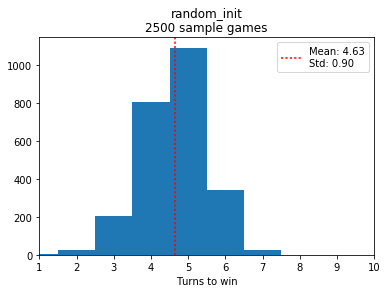

In [5]:
turns = []
for i in tqdm(range(n_games)):
    init = 'random'
    game = mastermind(guess_init=init)
    game.start_game()
    turns.append(len(game.guesses))

results.append((init,np.mean(turns), np.std(turns)))
plot_simulation(turns,'%s_init'%init)

100%|██████████| 2500/2500 [00:08<00:00, 288.79it/s]


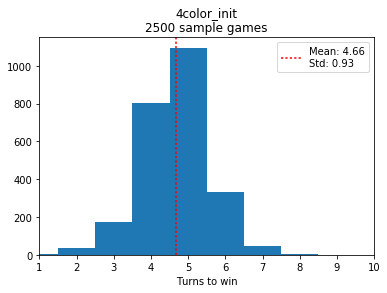

In [6]:
turns = []
for i in tqdm(range(n_games)):
    init = '4color'
    game = mastermind(guess_init=init)
    game.start_game()
    turns.append(len(game.guesses))

results.append((init,np.mean(turns), np.std(turns)))
plot_simulation(turns,'%s_init'%init)

100%|██████████| 2500/2500 [00:08<00:00, 306.99it/s]


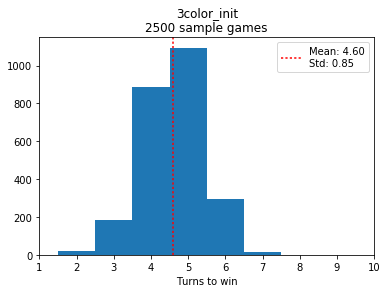

In [7]:
turns = []
for i in tqdm(range(n_games)):
    init = '3color'
    game = mastermind(guess_init=init)
    game.start_game()
    turns.append(len(game.guesses))

results.append((init,np.mean(turns), np.std(turns)))
plot_simulation(turns,'%s_init'%init)

100%|██████████| 2500/2500 [00:07<00:00, 325.24it/s]


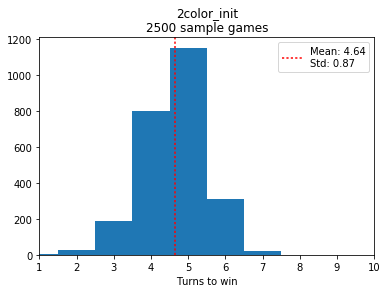

In [8]:
turns = []
for i in tqdm(range(n_games)):
    init = '2color'
    game = mastermind(guess_init=init)
    game.start_game()
    turns.append(len(game.guesses))

results.append((init,np.mean(turns), np.std(turns)))
plot_simulation(turns,'%s_init'%init)

100%|██████████| 2500/2500 [00:09<00:00, 270.47it/s]


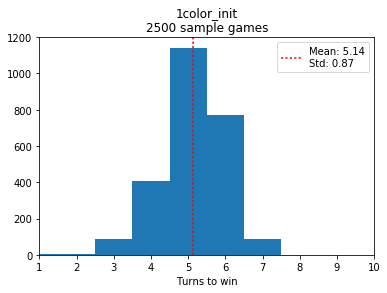

In [9]:
turns = []
for i in tqdm(range(n_games)):
    init = '1color'
    game = mastermind(guess_init=init)
    game.start_game()
    turns.append(len(game.guesses))

results.append((init,np.mean(turns), np.std(turns)))
plot_simulation(turns,'%s_init'%init)

In [10]:
print('(init; mean; std)')
for x in results:
    print(x[0],round(x[1],2),round(x[2],2))

(init; mean; std)
random 4.63 0.9
4color 4.66 0.93
3color 4.6 0.85
2color 4.64 0.87
1color 5.14 0.87
